In [2]:
import pandas as pd

In [6]:
from google.colab import files

uploaded = files.upload()

Saving ionosphere.zip to ionosphere.zip


In [7]:
import zipfile
import io
#Displaying First Few Record
# The 'uploaded' variable contains the dictionary from files.upload()
# It has the format {'filename.zip': b'file_content'}

# Get the name of the uploaded zip file
zip_filename = list(uploaded.keys())[0]

# Get the byte content of the zip file
zip_content_bytes = uploaded[zip_filename]

# Use io.BytesIO to treat the bytes as a file-like object
zip_file_object = io.BytesIO(zip_content_bytes)

# Open the zip file
with zipfile.ZipFile(zip_file_object, 'r') as zip_ref:
    # List contents of the zip file to identify the data file
    contents = zip_ref.namelist()
    print(f"Contents of '{zip_filename}': {contents}")

    # Heuristically try to find the actual data file (e.g., .data, .csv, .txt)
    data_file_in_zip = None
    for name in contents:
        if name.endswith(('.data', '.csv', '.txt')) and 'ionosphere' in name.lower():
            data_file_in_zip = name
            break
    if not data_file_in_zip and contents:
         # Fallback to the first file in the zip if no specific data file type is found
         data_file_in_zip = contents[0]

    if data_file_in_zip and data_file_in_zip in contents:
        # Read the specific data file from the zip into a pandas DataFrame
        with zip_ref.open(data_file_in_zip) as f:
            # Assuming 'ionosphere' dataset often doesn't have a header
            df = pd.read_csv(f, header=None)
            print(df.head(5))
    else:
        print(f"Could not find a suitable data file inside '{zip_filename}'.")
        print("Please check the zip contents and specify the correct file name if needed.")

Contents of 'ionosphere.zip': ['Index', 'ionosphere.data', 'ionosphere.names']
   0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32      

In [8]:
#Finding Summary of the DataFrame
list(df.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [9]:
#Transpose the dataframe
df.head(5).transpose()

,0,1,2,3,4
0,1,1,1,1,1
1,0,0,0,0,0
2,0.99539,1.0,1.0,1.0,1.0
3,-0.05889,-0.18829,-0.03365,-0.45161,-0.02401
4,0.85243,0.93035,1.0,1.0,0.9414
5,0.02306,-0.36156,0.00485,1.0,0.06531
6,0.83398,-0.10868,1.0,0.71216,0.92106
7,-0.37708,-0.93597,-0.12062,-1.0,-0.23255
8,1.0,1.0,0.88965,0.0,0.77152
9,0.0376,-0.04549,0.01198,0.0,-0.16399


In [10]:
#Dimension or size of the DataFrame
df.shape

(351, 35)

In [11]:
#Detailed summary:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [12]:
#Slicing and Indexing of Dataframe
#To select few rows and columns, the DataFrame can be accessed
#or sliced by indexes or names. The row and column indexes always start with value 0.

#Start with row with index 0 and end with row with index 5, but not including 5. [0:5] is same as [:5]. By default, the indexing always starts with 0:
df[0:5]

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [13]:
#Negative indexing: to select the last five records:
df[-5:]

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


In [14]:
#Specific columns of a DataFrame can also be selected or sliced by column names.:
df[6][0:5]

,6
0,0.83398
1,-0.10868
2,1.00000
3,0.71216
4,0.92106


In [15]:
#To select two columns,:
df[ [5, 6] ][0:5]

,5,6
0,0.02306,0.83398
1,-0.36156,-0.10868
2,0.00485,1.00000
3,1.00000,0.71216
4,0.06531,0.92106


In [16]:
#Specific rows and columns can also be selected using row and column indexes. Use iloc(index location) method:
df.iloc[4:9, 1:4]

,1,2,3
4,0,1.00000,-0.02401
5,0,0.02337,-0.00592
6,0,0.97588,-0.10602
7,0,0.00000,0.00000
8,0,0.96355,-0.07198


In [17]:
#The occurrences of each unique value in a column:
df[1].value_counts()

,count
1,
0,351


In [18]:
#Passing parameter normalize=True to the value_counts() will
#calculate the percentage of occurrences of each unique value.:
df[4].value_counts(normalize=True)*100

,proportion
4,
1.00000,27.350427
0.00000,10.826211
-1.00000,4.558405
0.85243,0.284900
0.94140,0.284900
...,...
0.73739,0.284900
0.95183,0.284900
0.93207,0.284900


In [ ]:
#Sorting DataFrame by Column Values(ascending by default):
df[[1, 2]].sort_values(2)[0:5]

,1,2
27,0,-1.0
29,0,-1.0
23,0,-1.0
41,0,-1.0
57,0,-1.0


In [ ]:
#Sorting in Descending order;
df [[4, 5]]. sort_values(5, ascending = False)[0:5]

,4,5
29,1.00000,1.0
31,1.00000,1.0
187,1.00000,1.0
184,-0.50694,1.0
41,1.00000,1.0


In [ ]:
#Creating New Columns:
df[1] = df[3] - df[5]

In [ ]:
df.groupby(4)[5].mean()


,5
4,
-1.00000,-0.034121
-0.78824,0.113420
-0.76190,-0.238100
-0.72973,1.000000
-0.50694,1.000000
...,...
0.99363,0.101230
0.99672,0.048610
0.99793,-0.130090


In [ ]:
df_mean_age = df.groupby(4)[5].mean().reset_index()
print(df_mean_age)

           4         5
0   -1.00000 -0.034121
1   -0.78824  0.113420
2   -0.76190 -0.238100
3   -0.72973  1.000000
4   -0.50694  1.000000
..       ...       ...
199  0.99363  0.101230
200  0.99672  0.048610
201  0.99793 -0.130090
202  0.99815  0.003690
203  1.00000  0.082219

[204 rows x 2 columns]


In [ ]:
# df1: Investors with Age less than 30
df1 = df[df[5] < 3]

# df2: Investors with Age 30 and above
df2 = df[df[5] >= 3]


In [ ]:
New_df = pd.concat([df1, df2], axis=0, ignore_index=True)

In [ ]:
#Re-naming columns:
df.rename(columns = {4:4}, inplace = True)

In [ ]:
#Filtering Records Based on Conditions
df [ df[2] > 0.5 ] [[3, 2]]

,3,2
0,-0.05889,0.99539
1,-0.18829,1.00000
2,-0.03365,1.00000
3,-0.45161,1.00000
4,-0.02401,1.00000
...,...,...
346,0.08298,0.83508
347,0.00419,0.95113
348,-0.00034,0.94701
349,-0.01657,0.90608


In [ ]:
#Removing a Column or a Row from a Dataset:
# 1. To drop a column, pass the column name and axis as 1.
# 2. To drop a row, pass the row index and axis as 0.
df.drop(8, inplace = True, axis = 1)

In [ ]:
#HANDLING MISSING VALUES
#To check if there are null values in a dataframe:
df.isnull()
#We can verify if some of the rows contain null values in column.
df[3].isnull()
#We can drop the rows with null values:
df = df.dropna()
df = df[3].dropna()

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

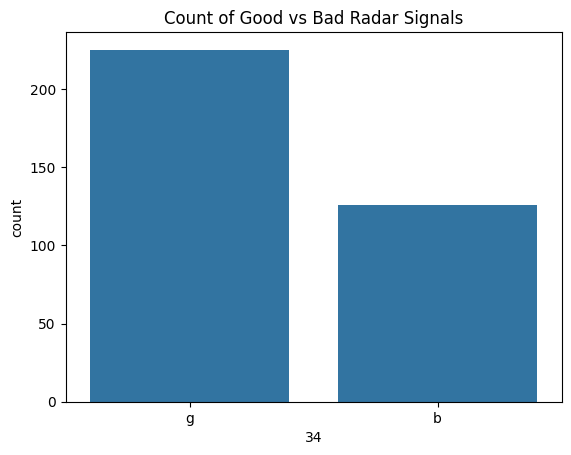

In [31]:
sns.countplot(x=df[34])
plt.title("Count of Good vs Bad Radar Signals")
plt.show()

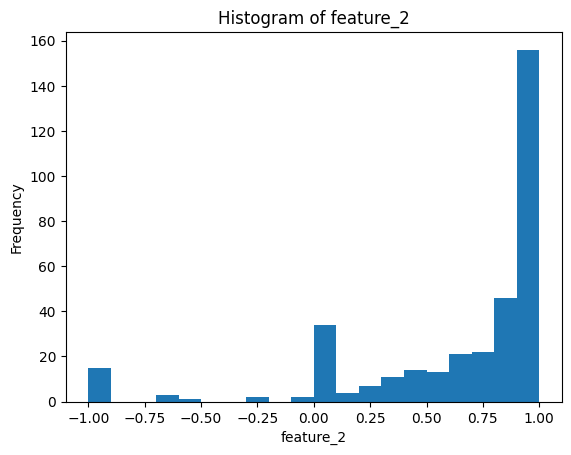

In [33]:
plt.hist(df[2], bins=20)
plt.title("Histogram of feature_2")
plt.xlabel("feature_2")
plt.ylabel("Frequency")
plt.show()

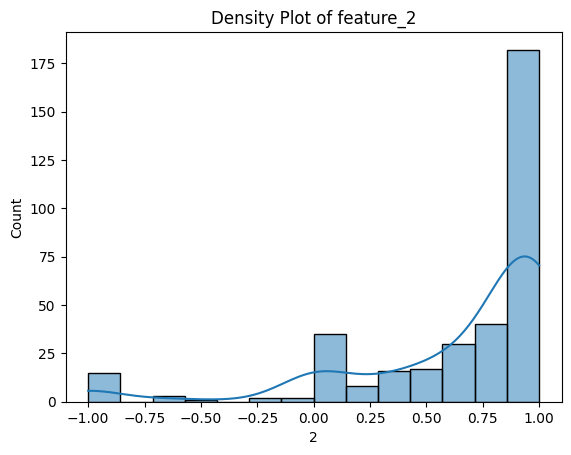

In [35]:
sns.histplot(df[2], kde=True)
plt.title("Density Plot of feature_2")
plt.show()

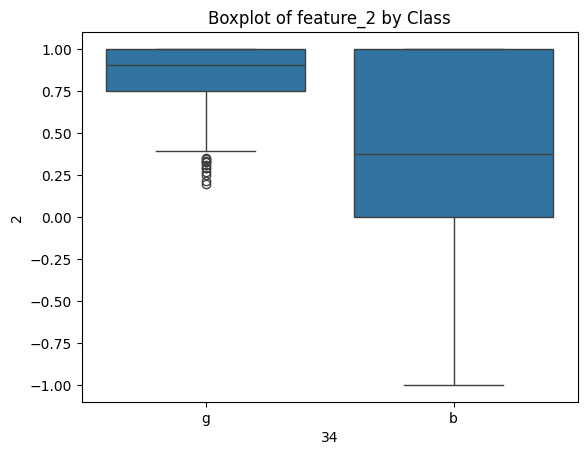

In [37]:
sns.boxplot(x=df[34], y=df[2])
plt.title("Boxplot of feature_2 by Class")
plt.show()

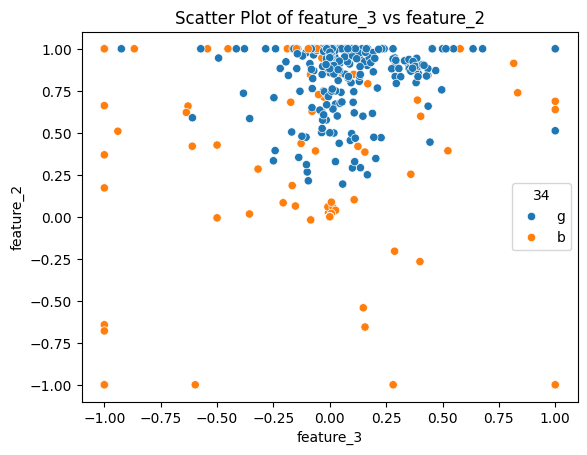

In [39]:
sns.scatterplot(x=df[3], y=df[2], hue=df[34])
plt.title("Scatter Plot of feature_3 vs feature_2")
plt.xlabel("feature_3")
plt.ylabel("feature_2")
plt.show()

In [41]:
corr_matrix = df.drop(34, axis=1).corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,...,0.016717,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,...,0.304898,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584
3,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,...,-0.104632,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608
4,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,...,0.243063,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478
5,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,...,-0.177576,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215
6,0.221867,NaN,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,...,0.286749,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460
7,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,...,-0.179928,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610
8,0.189242,NaN,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,...,0.356564,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597
9,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,...,-0.254785,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104


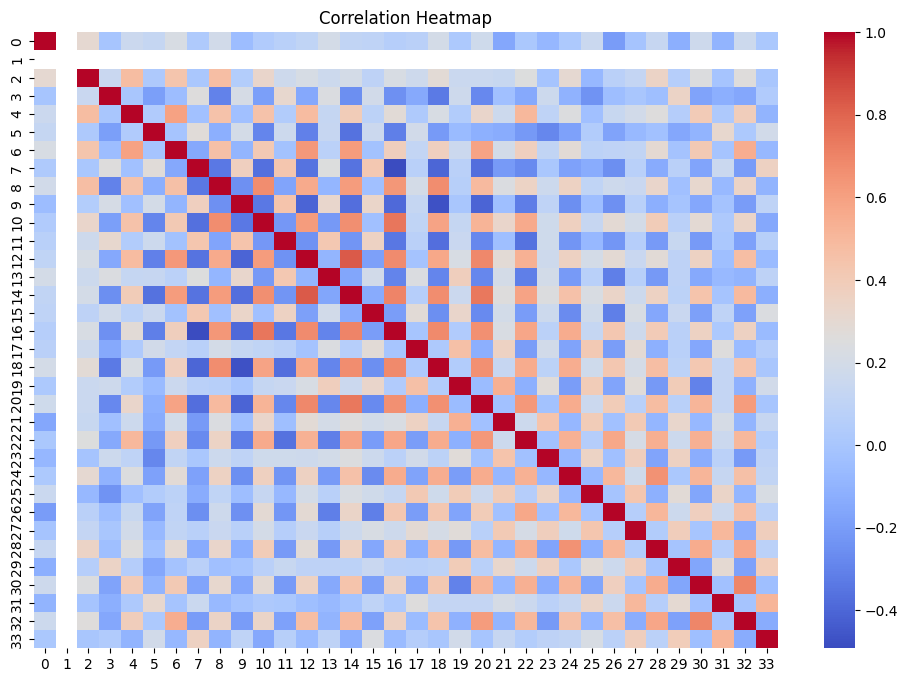

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
